# Conjunto de datos - Cáncer de colon (CRC)

* Introducción
* Exploración del conjunto de datos
* Conjunto de datos 1
* Pre procesado de imágenes

## Introducción

El conjunto de datos consiste en un grupo de imágenes fueron liberadas bajo [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/) pudiéndose descargar en esta [página](https://zenodo.org/record/53169/export/hx).

Cabe mencionar que la realización de los experimentos fue aprobada por el comité de ética de la Universidad de Heildelberg (Alemania) tal y como mencionan los autores Kather et al. en su [artículo](https://www.nature.com/articles/srep27988?WT.feed_name=subjects_translational-research) y así mismo se siguió la [Declaración de Helsinki](http://www.who.int/bulletin/archives/79%284%29373.pdf).

## Exploración del conjunto de datos

### Conjunto de datos 1

En este conjunto se hallan 8 categorías de tejido, listadas a continuación. En cada una de ellas hay 625 imágenes que **no se solapan entre sí**. Cada imagen tiene un tamaño de 150x150 px (píxeles), que se corresponden con 74$\mathrm{\mu}$m de tejido. En total son 5000 imágenes.

Categorías seleccionadas por los investigadores
1. Epitelio canceroso: Tejido epitelial, una o varias capas de celulas que constituyen revestimiento interno de organos y cavidades asi como la citada mucosa. https://es.wikipedia.org/wiki/Epitelio
2. Estroma simple (de composición homogenea, estroma tumoroso, estroma extra-tumoral y tejido blando): Se trata de la matriz extracelular, es un medio de integracion fisiologico, en el que están embebidas las células, en este caso la composición es homogénea https://es.wikipedia.org/wiki/Estroma_(histolog%C3%ADa) y https://es.wikipedia.org/wiki/Matriz_extracelular
3. Estroma complejo (células tumorosas y/o alguna célula inmune): Como el anterior pero en este caso, se hallan celulas tumorosas y alguna inmune
4. Células inmunes (conglomerado de células inmunes y folículos linfoides submucosos): Foliculo linfoide es una agrupacion de celulas sin organización / estructura, que se encuentra asociado a mucosas. Foliculo linfoide → https://es.wikipedia.org/wiki/Tejido_linfoide_asociado_a_las_mucosas. En el caso de esta investigacion GALT.
5. Material variado (mucosas, hemorrargía, necrosado): necrosado → conjunto de material muerto por patologia
6. Glándulas mucosas normales
7. Tejido adiposo: Tejido conjuntivo cuyas celulas acumulan lipidos en su citoplasma, cumple funciones mecánicas asi como fisiologicas. https://es.wikipedia.org/wiki/Tejido_adiposo
8. Imagen de fondo (no se corresponde con tejido)

### Conjunto de datos 2

Se hallan 10 imágenes grandes, de tamaño 5000x5000 px, que provienen de distinta región con respecto a las imágenes del conjunto anterior. Según los investigadores pueden ser usadas para comprobar distintas combinaciones de descriptores de textura o clasificadores en un entorno real.

Nota 1:

Los autores liberaron los dos conjuntos de imágenes, si bien se realiza la implementación de redes convolucionales con el primero de ellos.

Nota 2:

Al provenir de tan solo 10 pacientes hay que tener en cuenta el sesgo que se comete en esta investigación.

## Conjunto de datos 1

A continuación, se muestra la estructura del conjunto de datos. Las imágenes están ordenadas en subcapetas, habiendo 625 en cada una de ellas. En total 5000.

In [1]:
# python output
import os

PATH_TO_IMG = "../img-raw"

# 1
print("version 1: ", sorted(os.listdir(PATH_TO_IMG)))

# 2
imgCategories = sorted([category for category in os.listdir(PATH_TO_IMG)
                  if os.path.isdir(os.path.join(PATH_TO_IMG, category))])

print("version 2: ",imgCategories)

version 1:  ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY', 'Kather_texture_2016_image_tiles_5000.zip']
version 2:  ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']


Nota: La siguiente celda no conviene ejecutarla, es un comando de bash (consola linux)

bash command --> $tree -d img-raw/
bash linux output

img-raw/
├── 01_TUMOR
├── 02_STROMA
├── 03_COMPLEX
├── 04_LYMPHO
├── 05_DEBRIS
├── 06_MUCOSA
├── 07_ADIPOSE
└── 08_EMPTY

8 directories

In [2]:
# nº img by category

nImages = 0

for count, category in enumerate(imgCategories):
    categoryPath = os.path.join(PATH_TO_IMG, category)
    n = len([img for img in os.listdir(categoryPath) if os.path.isfile(os.path.join(categoryPath, img))])
    nImages += n
    print("%d. Category %s has: %d images" % (count+1, category,n))

print()
print("the whole dataset has: %d images" % (nImages))


1. Category 01_TUMOR has: 625 images
2. Category 02_STROMA has: 625 images
3. Category 03_COMPLEX has: 625 images
4. Category 04_LYMPHO has: 625 images
5. Category 05_DEBRIS has: 625 images
6. Category 06_MUCOSA has: 625 images
7. Category 07_ADIPOSE has: 625 images
8. Category 08_EMPTY has: 625 images

the whole dataset has: 5000 images


Cada imagen tiene 150x150 px, por lo que tiene 22500 *características* (features).

Las imágenes histológicas están en formato [TIF](https://en.wikipedia.org/wiki/TIFF).

In [3]:
# all img in a list To-Do improve print format of imgDict & imgList

# version 1: defaultdict

'''
link: https://docs.python.org/2/library/collections.html#collections.defaultdict

dict structure: key [category] - value [list of images (path/img.tif)]

'''

from collections import defaultdict

imgDict = defaultdict(list)

for imgCategory in imgCategories:
    imgFolder = os.path.join(PATH_TO_IMG, imgCategory)
    for img in os.listdir(imgFolder):
        if img.endswith(".tif"): # just in case there are other kind of files like .db
            
            # windows users: backslash management method replace is used [it is not mandatory tbh]
            #imgDict[imgCategory].append(os.path.join(imgFolder, img).replace("\\","/"))
            
            # linux users:
            imgDict[imgCategory].append(os.path.join(imgFolder, img))


# imgDict is not sorted

# sorting the img names
for imgPath in imgDict.values():
    imgPath.sort()  

# print(imgDict) # output: the whole deafultdict
# print(list(imgDict.values())) # output: list of paths of the dataset images
# print(len(list(imgDict.values())[1])) # number of images in cat 1
# list(imgDict.items()) # output: with list format

# version 2: list

'''
so this way we get a list of images and in order to get the category name
we have to use regex

'''

import re

imgList = []

for imgCategory in imgCategories:
    imgFolder = os.path.join(PATH_TO_IMG, imgCategory)
    
    for img in os.listdir(imgFolder):
        if img.endswith(".tif"): # just in case there are other kind of files like .db
            
            # windows users: backslash management method replace is used [it is not mandatory tbh]
            #imgList.append(os.path.join(imgFolder, img).replace("\\","/"))
            
            # linux users:
            imgList.append(os.path.join(imgFolder, img))

print(imgList[0]) # first element of the list
print(re.split('_\d+',imgList[0].split('/')[2])[0]) # category of the first element

#imgList

../img-raw/01_TUMOR/16B08_CRC-Prim-HE-07_025.tif_Row_1951_Col_451.tif
01_TUMOR


Se muestra el formato de una imagen aleatoria del conjunto.

Image's relative path: ../img-raw/01_TUMOR/5078_CRC-Prim-HE-03_009.tif_Row_601_Col_151.tif
Image's category: 01_TUMOR

Image's metadata
Image's extension: TIFF. Image's size (width, height): (150, 150). Image's mode: RGB.

The actual image: 



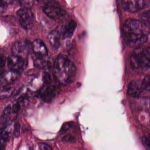

In [15]:
# show random img shape
from PIL import Image # http://pillow.readthedocs.io/en/3.4.x/handbook/tutorial.html
import random as rand

# random cat with random
# imgCategories[rand.randint(0, len(imgCategories))]

# random cat with numpy 

# get a random image shape from imgList and its attributes
myImagePath = imgList[rand.randint(0, nImages)]
myImage = Image.open(myImagePath)
extension, size, mode = myImage.format, myImage.size, myImage.mode


# prints

print("Image's relative path: %s" % myImagePath) # image's path
print("Image's category: %s" % re.split('_\d+',myImagePath.split('/')[2])[0]) # image's category
print()
print("Image's metadata")
print("Image's extension: %s. Image's size (width, height): (%d, %d). Image's mode: %s." % \
     (extension, size[0],size[1],mode))
print()
print("The actual image: ")
print()

myImage # the image

Se comprueba que todas las imágenes del conjunto poseen el mismo formato.

In [6]:
# check every img has the same shape
error = 0
for count, img in enumerate(imgList):
    
    if (Image.open(img).format != 'TIFF' ) or \
    (Image.open(img).size[0] != 150) or \
    (Image.open(img).size[1] != 150) or \
    (Image.open(img).mode != 'RGB'): 
        print("Image %s has got something different: " % img)
        error += 1

if (error == 0): print("Process finished with no errors.")
else: print("There is %d images in the dataset with some distinct image's parameter")

Process finished with no errors.


## Pre procesado de imágenes - repasar mejorar textos

Se han creado varias estructuras, y dependiendo de cuál se use se deberá proceder de una forma u otra. En cualquier caso, además se han de tener en cuenta lo siguientes puntos:

* Tamaño de la imagen: Cada arquitectura trabaja con un tamaño de imagen. En la función que toma como argumento la arquitectura de la red convolucional, se especifica este aspecto.

* Canales en la imagen: Tal y como se ha comentado la extensión de las imágenes es TIFF, tiene 3 canales (mode) para los colores rojo, verde y azul, que en inglés se codifican como Red - Green - Blue (RGB) respectivamente. Por defecto en el archivo keras.json (ver jupyter testing/system) se especifica el *"formato": "canales al final"*, en inglés *"image_data_format": "channels_last"*. Por lo que, las imágenes se deberán pasar de esta forma <lote, altura, ancho, canales>, en inglés <batch, height, width, channels>.

* Estructura del conjunto de datos: Con el atributo lotes del apartado anterior, se especifica el número de imágenes (lote) 

* Aumento del conjunto de imágenes (data augmentation): 

* Procedimiento - Pipeline: 



In [17]:
# preprocessing with imgList structure, basic changes to fit the convnet input
from PIL import Image # imported before

# http://effbot.org/imagingbook/introduction.htm

def img_preprocessing(arch, img, width = 150, height = 150):
    
    imgAux = Image.open(img)
    if(arch=="VGG16"):
        return imgAux.resize((224,224))

    #add new archs
    
    return img

# example imgList[0] --> ../img-raw/01_TUMOR/2642_CRC-Prim-HE-07_025.tif_Row_1351_Col_601.tif

exampleBefore = Image.open(imgList[0])
exampleAfter = img_preprocessing("VGG16",imgList[0])


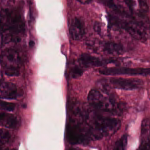

In [18]:
exampleBefore

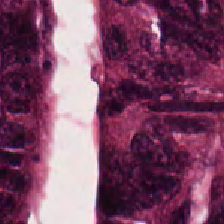

In [19]:
exampleAfter

# data augmentation with keras

In [ ]:
# preprocessing with imgList structure + keras
# https://keras.io/preprocessing/image/
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [ ]:
# image example data augmentation with keras
from keras.preprocessing.image import ImageDataGenerator

newDataSet = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,\
                                height_shift_range=0.2, rescale=1./255, shear_range=0.2,\
                                zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [ ]:
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())

In [ ]:
''''
mostramos las primeras 3-5 imagenes aleatorias en una fila
1.- sin pre procesado

2.- pre procesado simple (ampliacion con interpolacion lineal?)

3.- pre procesado + data augmentation con keras
'''' 